# Getting Started with Jupyter Notebooks, Pandas and More


** The goal of this notebook is to help you quickly get started analyzing and visulizing any data set using Python and Jupyter Notebooks. **

### Importing libraries and setup

**The following libraries will be imported**:
* pandas http://pandas.pydata.org/pandas-docs/stable/tutorials.html
* numpy https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* matplotlib https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

** %matplotlib inline** is on of the many **_magic_** commands http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Reading the CSV into a pandas.DataFrame

In [4]:
df = pd.read_csv('data.csv')

Pandas DataFrames are built on top of pandas.Series objects:
https://pandas.pydata.org/pandas-docs/stable/dsintro.html

The tl;dr is they are very similar to numpy arrays. 

The DataFrames can be thought of like an Excel spreadsheet (pandas can also import .xlsx files). The thing to keep in mind is each column represents a uniform data type.

### Exploring the data

In [5]:
df.head()

,time,channel,temperature_F,humidity
0,2018-01-02 00:00:33,8,11.9,46
1,2018-01-02 00:01:52,8,11.9,46
2,2018-01-02 00:03:12,8,11.9,46
3,2018-01-02 00:04:30,8,12.1,46
4,2018-01-02 00:05:49,8,12.1,46


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
channel,1585.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
temperature_F,1585.0,14.557603,6.152407,4.7,10.6,12.8,19.0,29.0
humidity,1585.0,48.545110,5.106877,40.0,45.0,48.0,50.0,61.0


The pandas.DataFrame.dtypes function returns a Series object of all the Python data types used by each of your colmuns. For example, your **time** column is stored internally as a **str** rather than a datetime object. This isn't the end of the world as Python will interpret the object's timeseries correctly.

However, it will be helpful a few steps from now if the **time** column was actually a datetime.

In [7]:
df.dtypes

time              object
channel            int64
temperature_F    float64
humidity           int64
dtype: object

To change the column's type there's a few things to go through. First is calling specific columns or rows in your DataFrame.

Calling your DataFrame in a cell will just dump the whole object.

In [7]:
df

,time,channel,temperature_F,humidity
0,2018-01-02 00:00:33,8,11.9,46
1,2018-01-02 00:01:52,8,11.9,46
2,2018-01-02 00:03:12,8,11.9,46
3,2018-01-02 00:04:30,8,12.1,46
4,2018-01-02 00:05:49,8,12.1,46
5,2018-01-02 00:07:09,8,12.1,46
6,2018-01-02 00:08:27,8,12.1,46
7,2018-01-02 00:09:46,8,12.1,46
8,2018-01-02 00:11:05,8,12.0,46
9,2018-01-02 00:12:24,8,12.1,46


To call specficially the **time** column I'm going to use **"["** and **"]"** to pass the column name.

In [28]:
df['time'].head()

0   2018-01-02 00:00:33
1   2018-01-02 00:01:52
2   2018-01-02 00:03:12
3   2018-01-02 00:04:30
4   2018-01-02 00:05:49
Name: time, dtype: datetime64[ns]

Note that a Series object is returned. 

In [9]:
type(df['time'])

pandas.core.series.Series

You can also pass a list of columns within the **"["** and **"]"**

In [27]:
df[['time','temperature_F']].head()

,time,temperature_F
0,2018-01-02 00:00:33,11.9
1,2018-01-02 00:01:52,11.9
2,2018-01-02 00:03:12,11.9
3,2018-01-02 00:04:30,12.1
4,2018-01-02 00:05:49,12.1


In [11]:
type(df[['time','temperature_F']])

pandas.core.frame.DataFrame

This time it's a DataFrame object that is returned.This matters for more advanced Pandas functions. For now, I'm just going to point this out for your edification.

### Manipulating the data

Series objects have a method called **apply** that allows you to pass functions (including lambdas) into the Series and apply it to each data point. This is how to convert this Series full of strings into Pandas datetime objects.

There are alternative ways to accomplish this but it's a great way to introduce the apply method.

In [26]:
df['time'].apply(pd.to_datetime).head()

0   2018-01-02 00:00:33
1   2018-01-02 00:01:52
2   2018-01-02 00:03:12
3   2018-01-02 00:04:30
4   2018-01-02 00:05:49
Name: time, dtype: datetime64[ns]

This converted the Series into datetime objects but it is not persistant. If you call the Series again they will still be string objects.

This is to help prevent information loss during the data exploration process. 

In [25]:
df['time'].head(10)

0   2018-01-02 00:00:33
1   2018-01-02 00:01:52
2   2018-01-02 00:03:12
3   2018-01-02 00:04:30
4   2018-01-02 00:05:49
5   2018-01-02 00:07:09
6   2018-01-02 00:08:27
7   2018-01-02 00:09:46
8   2018-01-02 00:11:05
9   2018-01-02 00:12:24
Name: time, dtype: datetime64[ns]

To keep the changes, you simply store the result of the apply function to the Series object.

In [8]:
df['time'] = df['time'].apply(pd.to_datetime)
df['time'].head()

0   2018-01-02 00:00:33
1   2018-01-02 00:01:52
2   2018-01-02 00:03:12
3   2018-01-02 00:04:30
4   2018-01-02 00:05:49
Name: time, dtype: datetime64[ns]

### Changing the Index

The next thing that will help with visulizating this dataset is making the new df['time'] Series the index. The index is essentially the key, in SQL terms, to the various Series objects. 

To change the index to this DataFrame, call the **pandas.DataFrame.set_index()** method and pass the **df['time']** Series as the argument. 

In [22]:
df.set_index(df['time']).head()

,time,channel,temperature_F,humidity
time,,,,
2018-01-02 00:00:33,2018-01-02 00:00:33,8,11.9,46
2018-01-02 00:01:52,2018-01-02 00:01:52,8,11.9,46
2018-01-02 00:03:12,2018-01-02 00:03:12,8,11.9,46
2018-01-02 00:04:30,2018-01-02 00:04:30,8,12.1,46
2018-01-02 00:05:49,2018-01-02 00:05:49,8,12.1,46


Notice the original **df['time']** column is still intact. Pandas does it's best to preserve information every step of the way. This forces you to explicitly transform the DataFrame when you want to alter it.

Also note, the **set_index()** method does not persist. 

In [21]:
df.head()

,time,channel,temperature_F,humidity
0,2018-01-02 00:00:33,8,11.9,46
1,2018-01-02 00:01:52,8,11.9,46
2,2018-01-02 00:03:12,8,11.9,46
3,2018-01-02 00:04:30,8,12.1,46
4,2018-01-02 00:05:49,8,12.1,46


In [9]:
df = df.set_index(df['time'])

In [30]:
df.head()

,time,channel,temperature_F,humidity
time,,,,
2018-01-02 00:00:33,2018-01-02 00:00:33,8,11.9,46
2018-01-02 00:01:52,2018-01-02 00:01:52,8,11.9,46
2018-01-02 00:03:12,2018-01-02 00:03:12,8,11.9,46
2018-01-02 00:04:30,2018-01-02 00:04:30,8,12.1,46
2018-01-02 00:05:49,2018-01-02 00:05:49,8,12.1,46


To remove, or drop, this now defunct df['time'] Series, DataFrames have a drop method. The main argument is either a single string of the Index or Column name. It also uses the "axis" argument to determine if you are refering to the Index or the Column. Axis 0 is the Index and Axis 1 is the Column

In [10]:
df.drop('time',axis=1).head()

,channel,temperature_F,humidity
time,,,
2018-01-02 00:00:33,8,11.9,46
2018-01-02 00:01:52,8,11.9,46
2018-01-02 00:03:12,8,11.9,46
2018-01-02 00:04:30,8,12.1,46
2018-01-02 00:05:49,8,12.1,46


Again, this is not persistant.

In [35]:
df.head()

,time,channel,temperature_F,humidity
time,,,,
2018-01-02 00:00:33,2018-01-02 00:00:33,8,11.9,46
2018-01-02 00:01:52,2018-01-02 00:01:52,8,11.9,46
2018-01-02 00:03:12,2018-01-02 00:03:12,8,11.9,46
2018-01-02 00:04:30,2018-01-02 00:04:30,8,12.1,46
2018-01-02 00:05:49,2018-01-02 00:05:49,8,12.1,46


The is an additional argument in the drop method called **inplace**. You can pass the bool **True** and the dropped columns will be permanently dropped.

In [11]:
df.drop('time',axis=1,inplace=True)

In [37]:
df.head()

,channel,temperature_F,humidity
time,,,
2018-01-02 00:00:33,8,11.9,46
2018-01-02 00:01:52,8,11.9,46
2018-01-02 00:03:12,8,11.9,46
2018-01-02 00:04:30,8,12.1,46
2018-01-02 00:05:49,8,12.1,46


### Plotting the data

Pandas has built-in visulization methods that tie directly into the matplotlib library. There are some slight changes to the methods' signatures but overall there are many similar features.

To plot a simple line graph, the **pandas.DataFrame.plot()** method will work on all of the numerical data passed in the *self* DataFrame/Series object.

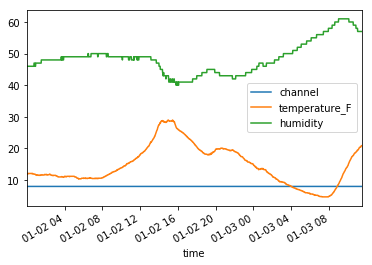

In [40]:
df.plot()

Note that each column was passed as the "y" values and the Index was passes as the "x" axis.

This plot has some extra information that isn't very helpful. Let's pull out the **channel** Series and see what the new plot looks like. Remember, you can pass a list of column names to explicitly reduce your data passed to the method.

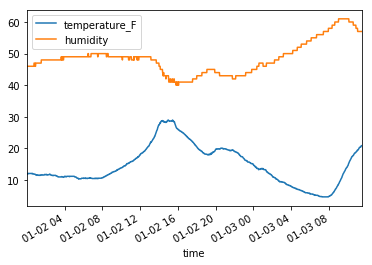

In [42]:
df[['temperature_F','humidity']].plot()

This plot is far more meaningful. You can also pass a single Series for further data isolation.

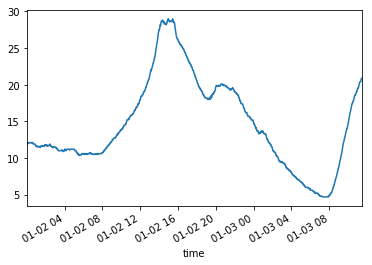

In [43]:
df['temperature_F'].plot()

Notice the scale of the plot changed to fit the range of the dataset. 

These plots are not the most legible at their current size. You can pass as an argument **figsize** which takes in (X, Y) pixel lengths.

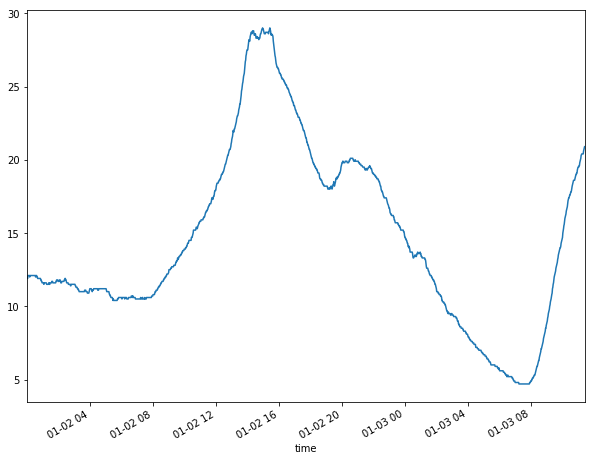

In [46]:
df['temperature_F'].plot(figsize=(10,8))

There are so many other features within matplotlib that I strongly recommend checking out the documentation and videos on YouTube. For now, I'm going to show you how to change the color, line width, and overall plot style

** 1. Changing line color**
<p> Pass the **color** argument with a color string like "red" or "blue"

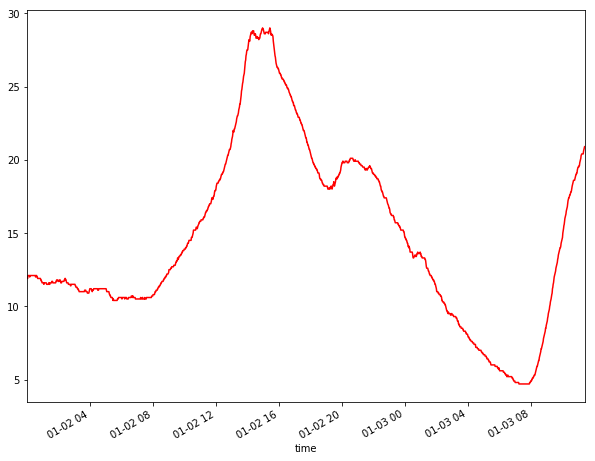

In [62]:
df['temperature_F'].plot(figsize=(10,8), color='red')

You can also pass hex color values

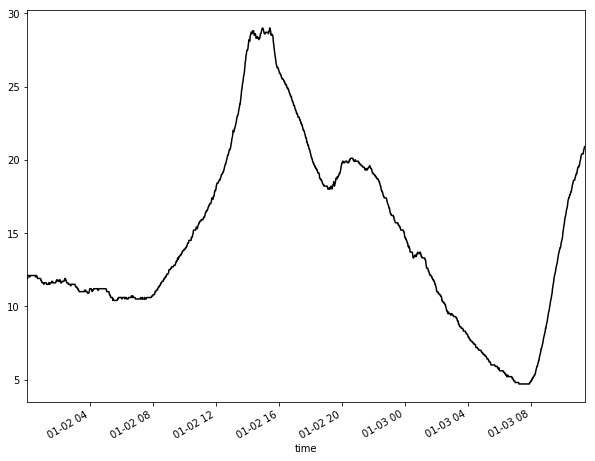

In [64]:
df['temperature_F'].plot(figsize=(10,8), color='#000000')

**2. Line thickness**
<p>To change the line thickness, use the **lw** argument and pass an decimal number

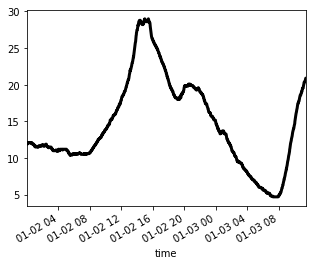

In [69]:
df['temperature_F'].plot(figsize=(5,4), color='#000000', lw=3)

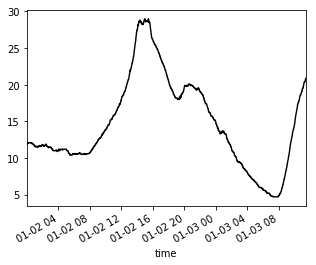

In [70]:
df['temperature_F'].plot(figsize=(5,4), color='#000000', lw=1.4)

** 3. Styling**
<p>Matplotlib.pyplot has style module that be leveraged to make large scale style changes to all of the future plots.

In [72]:
plt.style.use('ggplot')

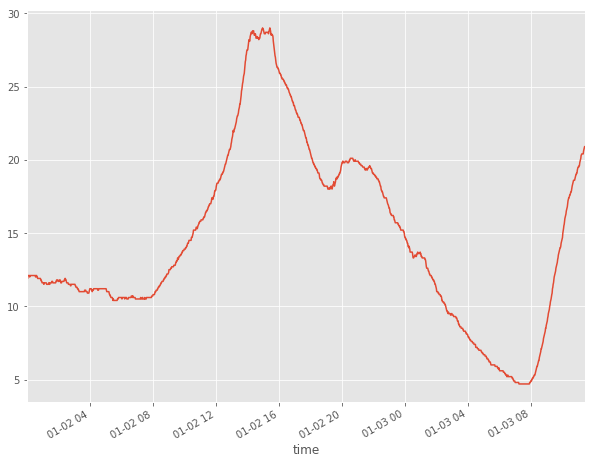

In [74]:
df['temperature_F'].plot(figsize=(10,8))

There is a whole reference page to these styles.
https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html

### Teaser

There is so much to dig into with Pandas and Matplotlib. Below is an example of using the subplot functionality that enables multiple axes to be plotted within a larger figure object. Pandas makes it easy to call a default presentation but I strongly encourage diving into Matplotlib to learn about the figure object implimentation. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D0493EC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025D04A174E0>]], dtype=object)

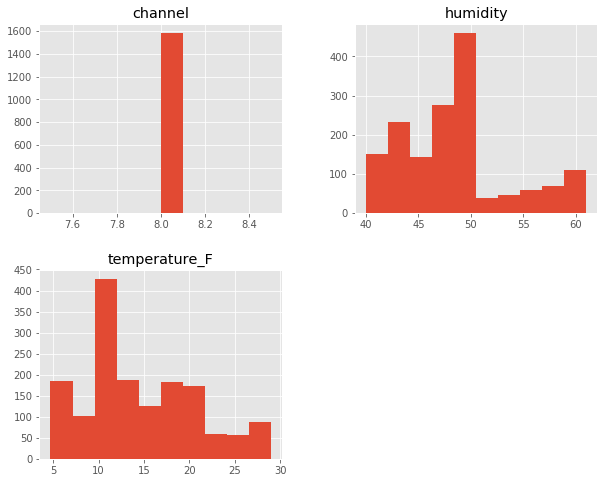

In [76]:
df.hist(figsize=(10,8))

# Have fun exploring!